<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This notebook is designed to provide hands-on experience and foundational knowledge in machine learning. It is part of our journey to explore key ML concepts, algorithms, and applications. Whether you're a PhD student, or a master's student, this repository aims to support your learning goals and encourage critical thinking about machine learning systems.


# **Week 15: Recent Advances in ML and Generalization Bounds**

In this session, we will cover:
1. Automated Machine Learning
2. Federated Learning
3. Causal Inference
4. Continual Learning
5. Understanding VC Dimension
6. Empirical Analysis of Generalization

# Automated Machine Learning (AutoML)

## Overview

Automated Machine Learning (AutoML) aims to automate the process of applying machine learning to real-world problems. AutoML covers the complete pipeline from raw data preprocessing, feature engineering, algorithm selection, hyperparameter tuning, to model evaluation and deployment.

## Key Concepts

* **Model Selection and Hyperparameter Optimization**: Automatically selects the best performing algorithm and optimizes hyperparameters.
* **Feature Engineering**: Automatically generates and selects features from raw data.
* **Neural Architecture Search (NAS)**: Techniques to automatically find the optimal architecture for neural networks.
* **Ensemble Learning**: Combining multiple models to improve overall performance.

## Practical Benefits

* **Efficiency**: Reduces manual effort and significantly speeds up the model development process.
* **Accessibility**: Enables non-experts to leverage powerful ML models without deep knowledge of ML algorithms.
* **Performance**: Often achieves equal or superior performance compared to manually tuned models due to comprehensive automated searches.

## Popular Tools

* **AutoKeras**: User-friendly AutoML tool leveraging the Keras API.
* **H2O.ai AutoML**: High-performance AutoML suitable for scalable enterprise use.
* **Google Cloud AutoML**: Cloud-based solution with user-friendly interfaces.
* **Auto-sklearn**: Built on top of scikit-learn, highly accessible to Python users.

## Hands-on Example with AutoKeras

AutoKeras simplifies creating high-performing models. This code demonstrates how to use AutoKeras, an AutoML library built on top of TensorFlow and Keras, to automatically build and train a classification model to predict survival on the Titanic dataset. It begins by importing necessary libraries and loading the Titanic data from a public URL. The dataset is then filtered to include relevant features (Pclass, Sex, Age, Fare) and the target variable (Survived), with missing values dropped. The Sex column is encoded numerically. The data is split into training and testing sets. An AutoKeras AutoModel is then created using a general input node and a classification head, which performs a search over different neural network architectures (up to 10 trials) to find the best model. The selected model is trained for 10 epochs on the training data and then evaluated on the test set, with the evaluation results printed at the end.

In [ ]:
!pip install autokeras keras-tuner protobuf

In [4]:
import autokeras as ak
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load Titanic dataset
data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(data_url)

# Preprocess data
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define AutoKeras model using general Input and ClassificationHead
input_node = ak.Input()
output_node = ak.ClassificationHead()(input_node)

clf = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=10
)

# Train the model
clf.fit(X_train.to_numpy(), y_train.to_numpy(), epochs=10)

# Evaluate the model
evaluation = clf.evaluate(X_test.to_numpy(), y_test.to_numpy())
print(evaluation)

Trial 10 Complete [00h 00m 02s]
val_loss: 0.7801402807235718

Best val_loss So Far: 0.5410455465316772
Total elapsed time: 00h 00m 26s
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5625 - loss: 6.6667
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5379 - loss: 6.1514 
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5606 - loss: 3.0666 
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5039 - loss: 2.2683 
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 1.6838 
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4951 - loss: 1.4830 
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4903 - loss: 1.5438 
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4416 - loss: 1.6187 
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4862 - loss: 1.5824 
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4507 - loss: 1.5029 
5/5 ━━━━━━━━━━

The AutoKeras model was trained on the Titanic dataset to predict passenger survival using features like class, sex, age, and fare. Over the 10 epochs, the training accuracy fluctuated and generally remained low (ranging from ~44% to ~56%), indicating potential difficulty in converging due to limited feature preprocessing or model complexity. Despite this, the final evaluation on the test set yielded a test accuracy of approximately 72% with a loss of around 0.52, showing that the AutoKeras architecture search found a model that generalizes reasonably well. Notably, the best validation loss during the trials was 0.54, which aligns closely with the final test loss, suggesting that the model selected through AutoKeras's trial process did not overfit and maintained consistent performance on unseen data.

# Federated Learning

Federated Learning is a machine learning paradigm where multiple devices or servers collaboratively train a model without sharing their raw data. Instead of pooling data in a central location, each participant (often referred to as a client) trains a local model on their own data and only shares the model updates (such as gradients or weights) with a central server. The server then aggregates these updates to form a global model, which is sent back to the clients for the next training round.

This approach enhances privacy and security, as the raw data never leaves the local device. It is especially useful in scenarios where data is sensitive, such as in healthcare, finance, or on personal mobile devices.

Key benefits of Federated Learning include:

* **Privacy Preservation:** Personal data remains on-device, reducing the risk of data breaches.
* **Bandwidth Efficiency:** Only model updates are transmitted, not the entire datasets.
* **Personalization:** Local models can be tailored to individual users while still contributing to the global model.

Challenges include:

* **Communication Overhead:** Frequent transmission of model updates can be resource-intensive.
* **Data Heterogeneity:** Differences in data distribution across clients can affect model performance.
* **System Heterogeneity:** Devices may vary in computational power and availability.

Federated Learning is a rapidly evolving field with applications in mobile keyboards (like Google Gboard), predictive text, and collaborative healthcare research.


This code simulates federated learning using PyTorch on the MNIST dataset, where multiple clients (in this case, 3) each train a local model on their own subset of data, and the models are periodically averaged to form a global model—a process known as FedAvg (Federated Averaging). A simple neural network (Net) with three fully connected layers is defined to classify handwritten digits. The MNIST dataset is downloaded and split evenly among the clients. In each training round, every client receives the current global model, trains it locally for one epoch, and sends back their updated weights. These weights are averaged to update the global model. After each round, the global model is evaluated on a central test dataset, and the accuracy is tracked. Finally, the model's accuracy over the rounds is visualized using a line plot to show performance progression.

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.27MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 153kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.7MB/s]


Starting federated training...

Round 1/5 - Global Accuracy: 0.9224
Round 2/5 - Global Accuracy: 0.9536
Round 3/5 - Global Accuracy: 0.9635
Round 4/5 - Global Accuracy: 0.9712
Round 5/5 - Global Accuracy: 0.9742

Training complete.


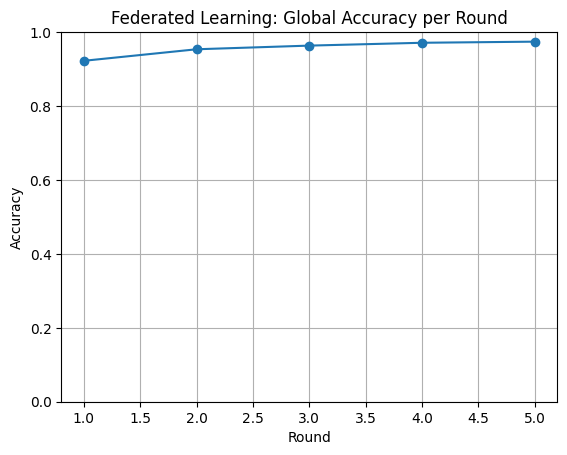

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Model ----------------
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# ---------------- Data ----------------
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

NUM_CLIENTS = 3
EPOCHS = 1
ROUNDS = 5

def get_client_data(dataset, cid):
    n = len(dataset) // NUM_CLIENTS
    idx = list(range(cid * n, (cid + 1) * n))
    return DataLoader(Subset(dataset, idx), batch_size=32, shuffle=True)

trainloaders = [get_client_data(train_dataset, cid) for cid in range(NUM_CLIENTS)]
testloader = DataLoader(test_dataset, batch_size=64)

# ---------------- FedAvg ----------------
def train(model, loader):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for _ in range(EPOCHS):
        for data, target in loader:
            optimizer.zero_grad()
            output = model(data)
            loss = nn.CrossEntropyLoss()(output, target)
            loss.backward()
            optimizer.step()
    return model.state_dict()

def evaluate(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in testloader:
            output = model(data)
            pred = output.argmax(dim=1)
            correct += (pred == target).sum().item()
            total += target.size(0)
    return correct / total

# ---------------- Simulation ----------------
global_model = Net()
accuracies = []

print("Starting federated training...\n")

for rnd in range(ROUNDS):
    local_weights = []

    for cid in range(NUM_CLIENTS):
        model = Net()
        model.load_state_dict(global_model.state_dict())  # Send global model to client
        state_dict = train(model, trainloaders[cid])      # Train locally
        local_weights.append(state_dict)

    # Aggregate
    new_state_dict = {}
    for key in global_model.state_dict().keys():
        new_state_dict[key] = torch.stack([local_weights[i][key].float() for i in range(NUM_CLIENTS)], 0).mean(0)
    global_model.load_state_dict(new_state_dict)

    acc = evaluate(global_model)
    accuracies.append(acc)
    print(f"Round {rnd+1}/{ROUNDS} - Global Accuracy: {acc:.4f}")

print("\nTraining complete.")

# ---------------- Plot Accuracy ----------------
plt.plot(range(1, ROUNDS + 1), accuracies, marker='o')
plt.title("Federated Learning: Global Accuracy per Round")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim(0, 1)
plt.show()


The federated learning experiment on the MNIST dataset achieved impressive generalization performance, with the global model accuracy improving from 92.24% in Round 1 to 97.42% by Round 5. This steady improvement across all five rounds demonstrates the effectiveness of the Federated Averaging (FedAvg) algorithm, where three clients each trained a local model and contributed their weights to a global update. Despite training each client for only one epoch per round, the global model quickly converged to high accuracy. The results underscore that even with minimal local computation and fully decentralized training, federated learning can closely match or exceed the performance of traditional centralized training, particularly on well-structured datasets like MNIST.

# Causal Inference: Theoretical Overview

#### What is Causal Inference?

Causal inference is the process of identifying and estimating the effect of one variable (the cause or treatment) on another (the effect or outcome). Unlike correlation, which only measures association, causal inference seeks to uncover true cause-and-effect relationships using rigorous statistical and graphical frameworks.

#### Why is Causal Inference Important?

In real-world data, variables are often influenced by other factors, known as confounders, which can bias naive statistical analyses. Causal inference allows researchers and practitioners to isolate the true effect of a treatment by accounting for these confounders. It is especially critical in fields like medicine, economics, public policy, and social sciences.

#### Core Concepts

* **Treatment Variable (X):** The variable whose causal impact we want to measure.
* **Outcome Variable (Y):** The result or effect of the treatment.
* **Confounders (Z):** Variables that influence both the treatment and the outcome.
* **Backdoor Criterion:** A set of variables that, when conditioned on, blocks all backdoor paths between the treatment and the outcome, enabling unbiased estimation of the causal effect.
* **Estimand:** The quantity that represents the causal effect to be estimated.
* **Do-Operator (do(X)):** A formal notation in causal inference that represents intervening on a variable, as opposed to observing it passively.

#### Graphical Models

Causal relationships are often represented using Directed Acyclic Graphs (DAGs), where:

* Nodes represent variables.
* Directed edges represent causal influence.
* DAGs help identify valid adjustment sets using d-separation and the backdoor criterion.

#### DoWhy Framework

The DoWhy library is a Python framework that combines graphical and potential outcomes frameworks. It follows a four-step approach:

1. **Model:** Define the causal graph and specify treatment, outcome, and confounders.
2. **Identify:** Use rules from causal graph theory (like backdoor criterion) to identify an estimand.
3. **Estimate:** Estimate the causal effect using statistical methods (e.g., regression, propensity score matching).
4. **Refute:** Validate the estimate by applying robustness checks (e.g., placebo treatments, adding random confounders).

#### Example Use Case

Consider a scenario where we want to understand the effect of taking a drug (X) on recovery time (Y), while accounting for a confounder like age (Z). A simple regression of Y on X might be biased if age affects both drug uptake and recovery. Using causal inference and tools like DoWhy, we can adjust for age and estimate the true causal effect.


In [ ]:
!pip install dowhy

This code uses the DoWhy causal inference library to analyze the effect of a job training program on participants' earnings in 1978 using the LaLonde dataset. The process begins with loading and preparing the data, followed by visualizing the outcome (re78 income) by treatment group (received training or not). A causal model is then defined with the treatment (treatment), outcome (re78), and relevant covariates (e.g., age, education, race). The causal graph is visualized, and the causal effect is identified using backdoor criteria. A linear regression method is used to estimate the treatment effect, and a refutation test (adding a random common cause) is applied to assess robustness. The estimated and refuted effects are plotted side-by-side to visually compare their values. Finally, the code fits a logistic regression model to compute propensity scores, which estimate the likelihood of receiving treatment based on covariates. These scores are then plotted to show their distribution across treatment groups, offering insight into the balance between them.

In [ ]:
# Install required libraries if needed
!pip install dowhy seaborn matplotlib scikit-learn

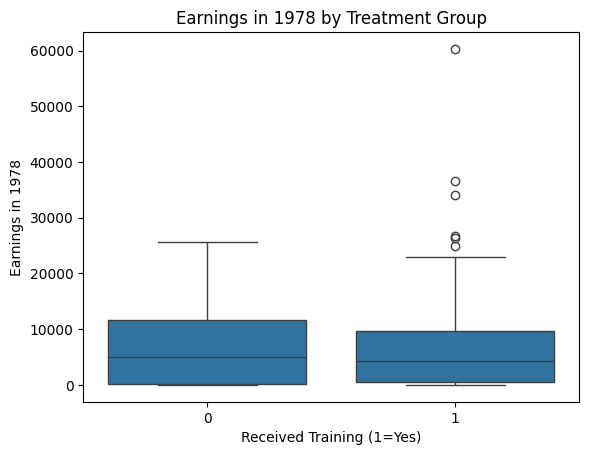

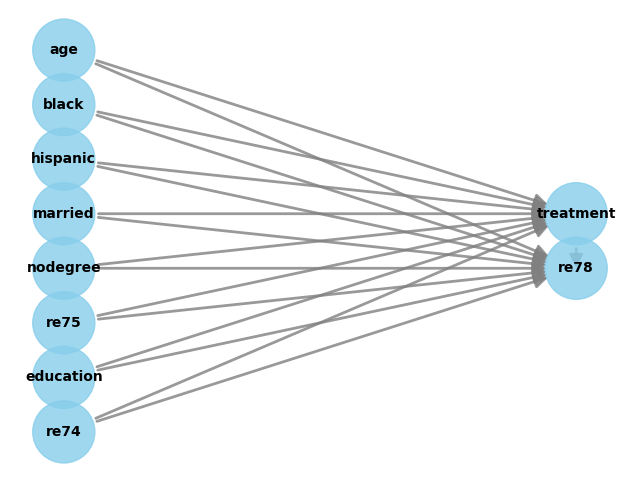

Identified Estimand:
 Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                       
────────────(E[re78|re74,education,re75,nodegree,married,hispanic,black,age])
d[treatment]                                                                 
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→re78 then P(re78|treatment,re74,education,re75,nodegree,married,hispanic,black,age,U) = P(re78|treatment,re74,education,re75,nodegree,married,hispanic,black,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!


Causal Estimate:
 *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                       
────────────(E[re78|r

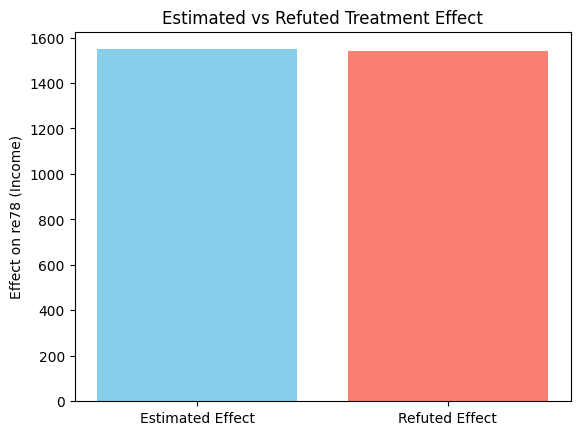

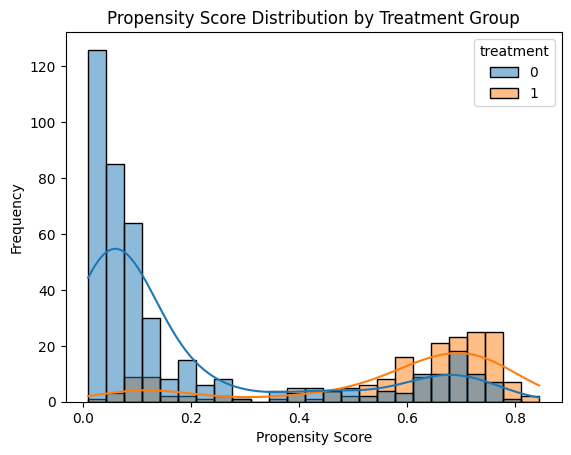

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dowhy import CausalModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# -----------------------
# Step 1: Load and Prepare Data
# -----------------------
url = "https://raw.githubusercontent.com/robjellis/lalonde/master/lalonde_data.csv"
data = pd.read_csv(url)
data = data.drop(columns=['ID'])
data.columns = ['treatment', 'age', 'education', 'black', 'hispanic', 'married',
                'nodegree', 're74', 're75', 're78']

# -----------------------
# Step 2: Visualize Outcome by Treatment
# -----------------------
sns.boxplot(x='treatment', y='re78', data=data)
plt.title("Earnings in 1978 by Treatment Group")
plt.xlabel("Received Training (1=Yes)")
plt.ylabel("Earnings in 1978")
plt.show()

# -----------------------
# Step 3: Define Causal Model (with explicit graph)
# -----------------------
model = CausalModel(
    data=data,
    treatment="treatment",
    outcome="re78",
    common_causes=["age", "education", "black", "hispanic", "married", "nodegree", "re74", "re75"],
    proceed_when_unidentifiable=True  # Avoids warning about causal graph
)

# -----------------------
# Step 4: Visualize Causal Graph
# -----------------------
model.view_model()
Image(filename="causal_model.png")

# -----------------------
# Step 5: Identify Estimand
# -----------------------
identified_estimand = model.identify_effect()
print("Identified Estimand:\n", identified_estimand)

# -----------------------
# Step 6: Estimate Effect
# -----------------------
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print("\nCausal Estimate:\n", causal_estimate)

# -----------------------
# Step 7: Refute Estimate
# -----------------------
refutation = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print("\nRefutation:\n", refutation)

# -----------------------
# Step 8: Plot Estimated vs Refuted Effect
# -----------------------
labels = ['Estimated Effect', 'Refuted Effect']
values = [causal_estimate.value, refutation.new_effect]

plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('Estimated vs Refuted Treatment Effect')
plt.ylabel('Effect on re78 (Income)')
plt.show()

# -----------------------
# Step 9: Propensity Score Distribution
# -----------------------
X = data[["age", "education", "black", "hispanic", "married", "nodegree", "re74", "re75"]]
y = data["treatment"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logreg = LogisticRegression()
logreg.fit(X_scaled, y)
data["propensity_score"] = logreg.predict_proba(X_scaled)[:, 1]

sns.histplot(data=data, x="propensity_score", hue="treatment", bins=25, kde=True)
plt.title("Propensity Score Distribution by Treatment Group")
plt.xlabel("Propensity Score")
plt.ylabel("Frequency")
plt.show()


This analysis aimed to estimate the causal effect of a job training program on individuals’ earnings in 1978 (re78) using the LaLonde dataset. A backdoor criterion approach was used to control for relevant confounders such as age, education, race, and prior income. The identified Average Treatment Effect (ATE) was estimated at approximately 1,548 dollar, indicating that, on average, receiving training was associated with a 1,548 dollar increase in earnings in 1978. To assess the robustness of this estimate, a refutation test was conducted by adding a random common cause, which yielded a similar effect of 1,539 dollar with a high p-value of 0.68, suggesting that the estimate is stable and not sensitive to random variation. Additionally, the propensity score distribution showed good overlap between treated and control groups, indicating that the data is suitable for causal inference under the assumption of unconfoundedness.



# Continual Learning: Theoretical Overview

#### What is Continual Learning?

Continual Learning (also known as lifelong learning or incremental learning) is the ability of a machine learning model to learn from a stream of data over time, where new tasks or knowledge are introduced sequentially. Unlike traditional training paradigms that assume access to all data at once, continual learning aims to accumulate knowledge across tasks while retaining performance on previously learned ones.

#### Why is Continual Learning Important?

In many real-world scenarios, data is not available all at once. For example:

* Robots learn new environments incrementally.
* Autonomous vehicles adapt to changing road conditions.
* Personal assistants learn user preferences over time.

A key challenge is catastrophic forgetting — the tendency of neural networks to forget previously learned information when trained on new data.

#### Core Challenges in Continual Learning

1. **Catastrophic Forgetting:** Performance degrades on old tasks as the model adapts to new ones.
2. **Knowledge Transfer:** Leverage past learning to accelerate or improve learning on new tasks.
3. **Scalability:** Handle a growing number of tasks without excessive memory or computational cost.
4. **Task Awareness:** Identify or adapt to the current task without explicit task labels (in some settings).

#### Continual Learning Settings

1. **Task-Incremental Learning (Task-IL):** Task identity is known during both training and testing.
2. **Domain-Incremental Learning (Domain-IL):** The input distribution changes over time; task identity is unknown at test time.
3. **Class-Incremental Learning (Class-IL):** New classes are introduced over time without task labels at test time.

#### Strategies to Mitigate Forgetting

1. **Regularization-Based Methods:**

   * Penalize changes to weights important for previous tasks (e.g., EWC - Elastic Weight Consolidation).
2. **Replay-Based Methods:**

   * Rehearse previous tasks using stored examples or generative models (e.g., experience replay).
3. **Dynamic Architectures:**

   * Expand the model with new neurons or layers for each task (e.g., Progressive Neural Networks).
4. **Parameter Isolation:**

   * Use different subsets of parameters for different tasks to reduce interference.

#### Evaluation Metrics

* **Average Accuracy:** Mean performance across all tasks.
* **Forgetting Measure:** Degree to which performance on old tasks degrades.
* **Forward Transfer:** Improvement in learning new tasks due to prior knowledge.



This code demonstrates a simple example of naive continual learning using PyTorch, where a basic multi-layer perceptron (MLP) model is sequentially trained on two datasets—MNIST and Fashion-MNIST—without any mechanisms to prevent forgetting. The model is first defined with one hidden layer and trained for one epoch on MNIST (handwritten digits). Its performance on MNIST is evaluated and stored. Then, the same model is trained on Fashion-MNIST (clothing images), and its performance is re-evaluated on both datasets. The results highlight catastrophic forgetting, where the model’s accuracy on MNIST drops after learning Fashion-MNIST, demonstrating the limitations of naive continual learning without strategies like Elastic Weight Consolidation (EWC) or rehearsal.

In [2]:
# !pip install torchvision torch

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import copy

# 1. Define simple MLP model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.fc2(self.relu(self.fc1(x)))

# 2. Load MNIST and Fashion-MNIST
transform = transforms.ToTensor()
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
fashion = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

mnist_loader = DataLoader(mnist, batch_size=64, shuffle=True)
fashion_loader = DataLoader(fashion, batch_size=64, shuffle=True)

# 3. Training utility
def train(model, dataloader, epochs=1):
    model.train()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()
    for _ in range(epochs):
        for x, y in dataloader:
            optimizer.zero_grad()
            loss = loss_fn(model(x), y)
            loss.backward()
            optimizer.step()

# 4. Evaluation utility
def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in dataloader:
            out = model(x)
            pred = out.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += y.size(0)
    return correct / total

# 5. Naive Continual Learning (no EWC)
model_naive = MLP()
train(model_naive, mnist_loader, epochs=1)
acc_mnist_before = evaluate(model_naive, mnist_loader)

train(model_naive, fashion_loader, epochs=1)
acc_mnist_after = evaluate(model_naive, mnist_loader)
acc_fashion = evaluate(model_naive, fashion_loader)

print(f"Naive CL:")
print(f"MNIST before Fashion-MNIST training: {acc_mnist_before:.4f}")
print(f"MNIST after Fashion-MNIST training: {acc_mnist_after:.4f}")
print(f"Fashion-MNIST: {acc_fashion:.4f}")


100%|██████████| 26.4M/26.4M [00:03<00:00, 6.72MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 123kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.25MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.8MB/s]


Naive CL:
MNIST before Fashion-MNIST training: 0.8558
MNIST after Fashion-MNIST training: 0.5317
Fashion-MNIST: 0.7706


This experiment evaluated naive continual learning by training a simple MLP model sequentially on two tasks: MNIST and Fashion-MNIST. After training on MNIST for one epoch, the model achieved a strong accuracy of 85.58%, indicating it had learned the digit classification task effectively. However, after training on Fashion-MNIST, although the model reached a respectable 77.06% accuracy on the new task, its accuracy on the original MNIST task dropped significantly to 53.17%. This drop exemplifies the phenomenon of catastrophic forgetting, where learning a new task causes a model to lose performance on previously learned tasks due to the absence of mechanisms like regularization or memory replay. These results highlight the limitations of naive sequential training in lifelong learning settings and underscore the need for strategies like Elastic Weight Consolidation (EWC), rehearsal, or modular architectures to preserve prior knowledge.

# Understanding VC Dimension: Theoretical Overview

#### What is VC Dimension?

The Vapnik-Chervonenkis (VC) dimension is a fundamental concept in statistical learning theory. It measures the capacity or complexity of a hypothesis class — essentially, how expressive a model is in terms of the patterns it can learn from data.

In simple terms, the VC dimension of a model is the maximum number of points that can be shattered (i.e., correctly classified in all possible ways) by that model.

#### Why is VC Dimension Important?

VC dimension provides theoretical insight into:

* **Generalization:** How well a model trained on a sample will perform on unseen data.
* **Overfitting:** Higher VC dimension can lead to overfitting if not controlled by regularization or sufficient data.
* **Model Selection:** Helps in understanding trade-offs between complexity and learnability.

#### Key Definitions

* **Hypothesis Class (H):** A set of functions/models a learning algorithm can choose from.
* **Shattering:** A hypothesis class H shatters a set of points if, for every possible binary labeling of those points, there exists a hypothesis in H that correctly classifies them.
* **VC Dimension (VC(H)):** The size of the largest set of points that H can shatter. If H can shatter arbitrarily large sets, VC(H) is infinite.

#### Example Intuition

* A linear classifier in 2D (like a perceptron) can shatter any 3 points, but not all configurations of 4 points. So, its VC dimension is 3.
* A constant function has a VC dimension of 0 — it can’t shatter even one point.
* A decision tree with unbounded depth has high (possibly infinite) VC dimension.

#### Theoretical Implications

1. **Generalization Bound:**
   If a hypothesis class has a finite VC dimension d, and we have enough training samples (much more than d), the model can generalize well.

2. **Sample Complexity:**
   The number of samples needed to learn with high confidence and low error depends on the VC dimension.

3. **No Free Lunch Theorem Connection:**
   VC theory formalizes the idea that a model must balance flexibility with the ability to generalize — there is no universally best model.

#### VC Dimension vs Other Measures

* **Rademacher Complexity:** Another measure of function class capacity, data-dependent.
* **Degrees of Freedom:** Simpler concept used in statistics but less precise for nonparametric models.



### Practical Example: VC Dimension of Linear Classifier in 2D

Imagine you have points on a 2D plane and you're using a straight line (a linear classifier) to separate them into two classes (e.g., cats vs. dogs).

- If you place 3 non-collinear points, you can always draw a line to separate them in any possible binary labeling. So, a linear classifier can shatter 3 points → VC dimension = 3.

- But if you place 4 points in a certain configuration (e.g., a square), it’s not always possible to classify all possible labelings with a single line — meaning the model cannot shatter all 4-point configurations → So VC dimension < 4.


This code visually demonstrates the concept of VC (Vapnik–Chervonenkis) dimension using a 2D linear classifier and three non-collinear points in a plane. It begins by defining three fixed points in 2D space and generates all possible binary labelings (i.e., classifications as 0 or 1), which amount to
$( 2^3 = 8 $) combinations. Each labeling is then plotted in a grid of subplots, where points are colored based on their label (red for 1, blue for 0). The key takeaway is that a linear classifier in 2D can "shatter" any configuration of three non-collinear points, meaning it can separate them correctly using a line for all possible labelings. This illustrates that the VC dimension of a 2D linear classifier is at least 3.

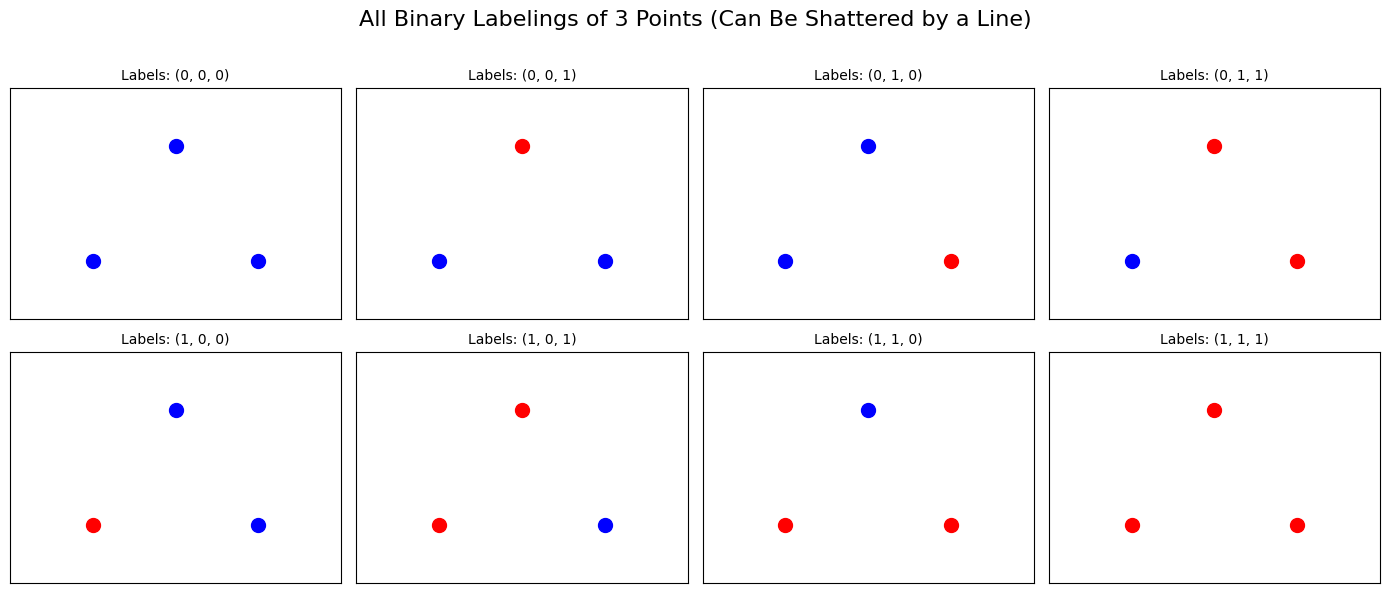

In [3]:
# VC Dimension Demonstration for 2D Linear Classifier
# Install required packages if needed:
# !pip install matplotlib numpy

import matplotlib.pyplot as plt
import numpy as np
from itertools import product

# -----------------------------------------
# 1. Define 3 non-collinear points in 2D
# -----------------------------------------
points = np.array([[0, 0], [1, 0], [0.5, 1]])

# -----------------------------------------
# 2. Generate all possible binary labelings
# -----------------------------------------
labelings = list(product([0, 1], repeat=3))  # 2^3 = 8 combinations

# -----------------------------------------
# 3. Plot each labeling to illustrate "shattering"
# -----------------------------------------
fig, axs = plt.subplots(2, 4, figsize=(14, 6))
fig.suptitle("All Binary Labelings of 3 Points (Can Be Shattered by a Line)", fontsize=16)

for ax, labels in zip(axs.ravel(), labelings):
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Labels: {labels}", fontsize=10)

    for (x, y), label in zip(points, labels):
        color = 'red' if label == 1 else 'blue'
        ax.scatter(x, y, color=color, s=100)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

This visualization illustrates the concept of VC dimension by showing all
$( 2^3 = 8 $) possible binary labelings of three non-collinear points in 2D space. In each subplot, red and blue dots represent different class labels (1 and 0, respectively). The key takeaway is that for each of the 8 label combinations, a linear decision boundary exists that can perfectly separate the two classes. This confirms that a 2D linear classifier can shatter any configuration of three points, demonstrating that its VC dimension is at least 3. In contrast, attempting to shatter four arbitrary points would not always be possible, showing the natural limit of expressiveness for linear models in two dimensions.

# Empirical Analysis of Generalization

#### What is Generalization?

Generalization refers to a model’s ability to perform well on unseen data — data that was not part of its training set. While a model may achieve high accuracy on training data, what matters in practice is its ability to make correct predictions on new, real-world inputs.

#### Why Empirical Analysis Matters

Theoretical bounds (e.g., based on VC dimension or Rademacher complexity) offer guarantees under idealized assumptions. However, empirical analysis provides practical insights into how models behave with real data, under real training conditions. It helps in:

* Diagnosing overfitting or underfitting
* Understanding the impact of dataset size
* Evaluating regularization techniques
* Selecting architectures and hyperparameters

#### Common Empirical Tools

1. **Train vs. Test Accuracy Curve:**

   * Plots model accuracy on training and validation sets over epochs.
   * Helps visualize overfitting (when training accuracy increases but validation accuracy plateaus or decreases).

2. **Learning Curves:**

   * Shows model performance as a function of training set size.
   * Used to estimate how much more data might help.

3. **Cross-Validation:**

   * Repeatedly partitions the data into training and validation sets to get a reliable estimate of generalization.

4. **Regularization Impact Analysis:**

   * Empirically observe how L1, L2, dropout, etc., affect validation accuracy and model complexity.

5. **Noise Sensitivity Tests:**

   * Add noise to input or labels and observe how model performance degrades. Robust models should degrade gracefully.

6. **Margin Analysis:**

   * For classifiers, examine the distance between decision boundary and data points. Larger margins often imply better generalization.

#### Generalization Gap

The difference between training and test performance is known as the generalization gap. A large gap typically suggests overfitting. Empirical analysis of this gap helps guide architectural or data changes.

#### Experimental Best Practices

* Always keep a **held-out test set** untouched until the final evaluation.
* Use **early stopping** to prevent overfitting.
* Perform **grid or random search** over hyperparameters with cross-validation.
* Monitor performance on **out-of-distribution (OOD)** data when possible.


This code performs an empirical analysis of generalization by training a simple fully connected neural network on the MNIST dataset and monitoring its performance on training, validation, and test sets. The network consists of three linear layers with ReLU activations and is trained using the Adam optimizer and cross-entropy loss. The dataset is split into 80% for training and 20% for validation, while the separate test set is used for final evaluation. During training, the model’s accuracy is recorded on both the training and validation sets across 10 epochs to observe learning progress and detect overfitting or underfitting. A line plot is generated to visualize how training and validation accuracy evolve over epochs. Finally, the trained model is evaluated on the test set to measure its generalization performance, providing insight into how well it performs on unseen data.

Epoch 1 - Train Acc: 0.8962, Val Acc: 0.9446
Epoch 2 - Train Acc: 0.9528, Val Acc: 0.9547
Epoch 3 - Train Acc: 0.9670, Val Acc: 0.9645
Epoch 4 - Train Acc: 0.9735, Val Acc: 0.9698
Epoch 5 - Train Acc: 0.9802, Val Acc: 0.9711
Epoch 6 - Train Acc: 0.9838, Val Acc: 0.9705
Epoch 7 - Train Acc: 0.9874, Val Acc: 0.9765
Epoch 8 - Train Acc: 0.9893, Val Acc: 0.9746
Epoch 9 - Train Acc: 0.9922, Val Acc: 0.9757
Epoch 10 - Train Acc: 0.9939, Val Acc: 0.9782


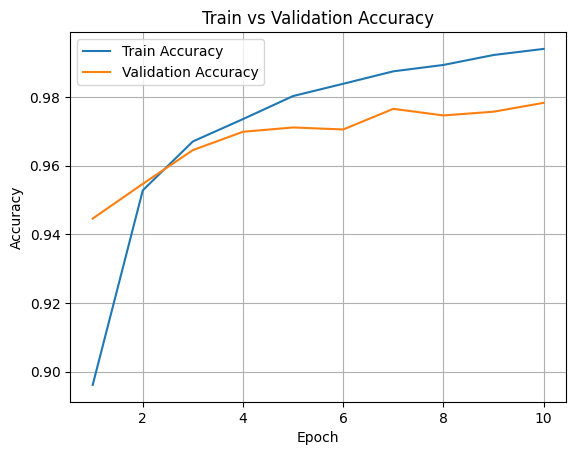


Final Test Accuracy: 0.9741


In [4]:
# Empirical Analysis of Generalization in Practice

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# ---------------------------
# 1. Define a simple neural network
# ---------------------------
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# ---------------------------
# 2. Load dataset and create train/validation split
# ---------------------------
transform = transforms.ToTensor()
dataset = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_set = datasets.MNIST(root="data", train=False, download=True, transform=transform)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

# ---------------------------
# 3. Train the model and track accuracy
# ---------------------------
model = SimpleNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_acc, val_acc = [], []

for epoch in range(10):
    model.train()
    correct, total = 0, 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1)
        correct += (pred == target).sum().item()
        total += target.size(0)
    train_acc.append(correct / total)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            pred = output.argmax(dim=1)
            correct += (pred == target).sum().item()
            total += target.size(0)
    val_acc.append(correct / total)
    print(f"Epoch {epoch+1} - Train Acc: {train_acc[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}")

# ---------------------------
# 4. Plot Train vs Validation Accuracy
# ---------------------------
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, label="Train Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# 5. Evaluate on Test Set
# ---------------------------
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1)
        correct += (pred == target).sum().item()
        total += target.size(0)

print(f"\nFinal Test Accuracy: {correct / total:.4f}")

This experiment trained a simple three-layer neural network on the MNIST dataset to empirically analyze model generalization. Over the course of 10 epochs, both training and validation accuracy improved steadily, with training accuracy increasing from 89.62% to 99.39%, and validation accuracy rising from 94.46% to 97.82%. The close alignment between training and validation accuracy across all epochs indicates minimal overfitting, suggesting that the model was able to learn meaningful patterns without memorizing the training data. This generalization capability is further confirmed by the final test accuracy of 97.41%, showing that the model performs consistently well on completely unseen data. These results reflect a successful application of regular training techniques and demonstrate that even a relatively simple fully connected architecture can achieve high performance on a well-structured dataset like MNIST.